## Content

Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.

This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc

Column Description
name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

Presence of -1 in any of the columns indicates NaN value.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data = pd.read_csv('../data/India-food/indian_food.csv')
# data.dropna(inplace = True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
name              255 non-null object
ingredients       255 non-null object
diet              255 non-null object
prep_time         255 non-null int64
cook_time         255 non-null int64
flavor_profile    255 non-null object
course            255 non-null object
state             255 non-null object
region            254 non-null object
dtypes: int64(2), object(7)
memory usage: 18.0+ KB


### explolation data

Certainly , The first man task of data scientist is data analysis. For understand can we use data promptly?
In the real world data science project. The such data might include the null data or False data collection. 

In [4]:
data.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

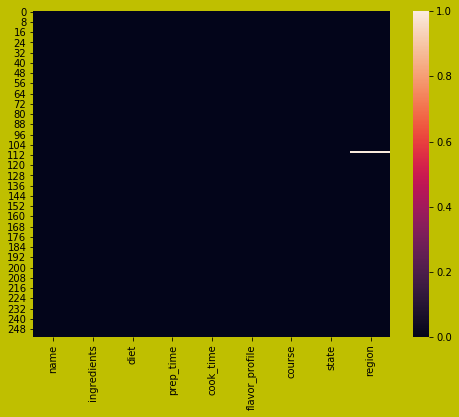

In [5]:
#### Visualization null data for looking for na data

plt.figure(figsize=(8,6),facecolor='y')
sns.heatmap(data.isnull())

In [6]:
### Drop the NA row

data.dropna(axis=0,inplace=True)

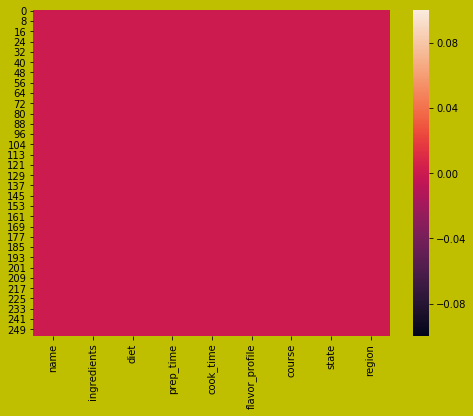

In [7]:
#### Visualization null data for looking for na data again

plt.figure(figsize=(8,6),facecolor='y')
sns.heatmap(data.isnull())

In [8]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


### Exploring false collection data

Usually, Probably there is false data in correction data. They are outliner data that make data to false analysis

As cell below there are some weird data in prep_time and cook_time


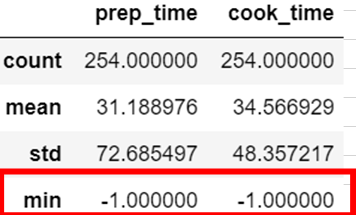

In [9]:
data.describe()

,prep_time,cook_time
count,254.000000,254.000000
mean,31.188976,34.566929
std,72.685497,48.357217
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [10]:
data.describe(include='O')

,name,ingredients,diet,flavor_profile,course,state,region
count,254,254,254,254,254,254,254
unique,254,251,2,5,4,25,7
top,Brown Rice,"Arbi ke patte, sesame seeds, gur, bengal gram ...",vegetarian,spicy,main course,Gujarat,West
freq,1,2,225,133,129,35,74


In [11]:
data.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [12]:
data['flavor_profile'].unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

In [13]:
data['region'].unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central'],
      dtype=object)

In [14]:
### Filter the index about false data for cleaning

drop_col = data[(data['flavor_profile']== '-1') | (data['state']== '-1') | (data['region'] == '-1')| (data['prep_time'] == -1)| (data['cook_time'] == -1)].index
data = data.drop(index=drop_col)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 253
Data columns (total 9 columns):
name              180 non-null object
ingredients       180 non-null object
diet              180 non-null object
prep_time         180 non-null int64
cook_time         180 non-null int64
flavor_profile    180 non-null object
course            180 non-null object
state             180 non-null object
region            180 non-null object
dtypes: int64(2), object(7)
memory usage: 14.1+ KB


### Visualization Data

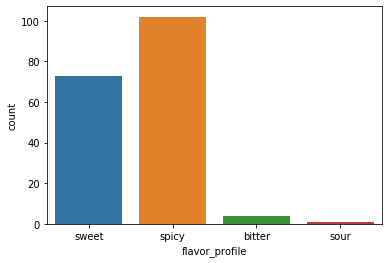

In [16]:
## The Most flavorite taste of Indian food

sns.countplot(data.flavor_profile)

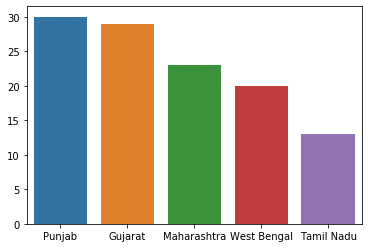

In [17]:
top5_state = pd.value_counts(data.state)[:5]
sns.barplot(x= top5_state.index,y = top5_state.values)

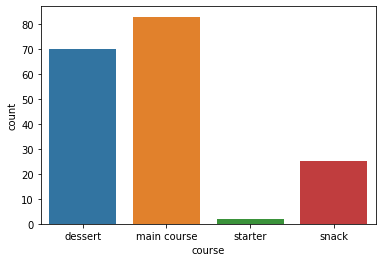

In [18]:
# The most type of indian food course

sns.countplot(data.course)

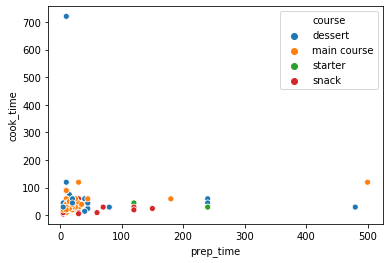

In [19]:
### There are outlier data both prep_time and cook_time
sns.scatterplot(x = data.prep_time ,y = data.cook_time,hue=data.course)

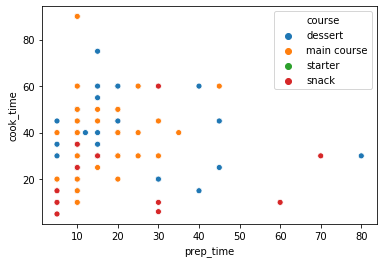

In [20]:
sns.scatterplot(x = data[data['prep_time']<100].prep_time ,y = data[data['cook_time']<100].cook_time,hue=data.course)

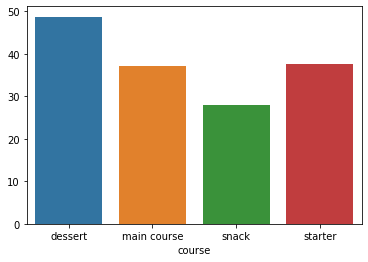

In [21]:
### Finding the average cooking time for indian course
sns.barplot(x = data.groupby(data.course).mean()['cook_time'].index,y = data.groupby(data.course).mean()['cook_time'].values)

In [26]:
ingres = []
food_ingredient = {}

for index,food in enumerate(data['name']):
    temp = []
    for ingredient in data['ingredients'].iloc[index].split(','):
        temp.append(ingredient)
        ingres.append(ingredient)
    food_ingredient[food]= temp
#         for i in ingredient.split(","):
#             b.union(set(i))

In [28]:
### Finding the most ingredient used in cooking indian foods 
ingredient_count = collections.Counter(ingres)

In [33]:
top10_ingres = ingredient_count.most_common()[:10]
print(top10_ingres)

[(' sugar', 33), (' garam masala', 23), (' ghee', 21), (' ginger', 18), (' jaggery', 17), ('Rice flour', 15), (' curry leaves', 13), (' milk', 11), (' garam masala powder', 11), (' urad dal', 11)]


In [59]:
most_common_ingres = []
count_most_common = []
for k,v in top10_ingres:
    most_common_ingres.append(k)
    count_most_common.append(v)

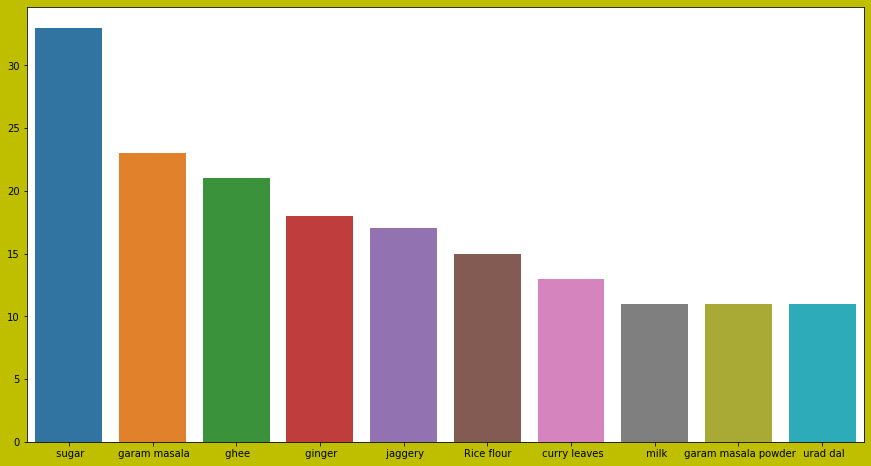

In [66]:
plt.figure(figsize=(15,8),facecolor='y')
sns.barplot(x = most_common_ingres,y = count_most_common)

In [ ]:
def ingredients(data):
    temp = data['ingredients'].str.lower().str.split(',')
    mf = MultiLabelBinarizer()
    df = pd.DataFrame(mf.fit_transform(temp),columns=mf.classes_)
    data.drop(columns='ingredients',inplace = True)              
    return data.merge(df,left_index=True,right_index=True)

In [ ]:
data = ingredients(data)

In [ ]:
data.head()

In [ ]:
sns.countplot(x = data['course'])
# pd.value_counts(data['course'])

In [ ]:
plt.figure(figsize = (8,7))
sns.countplot(x = data['region'])

In [ ]:
def encoder(data):
    need_to_encode = ['diet','flavor_profile','course','state','region']
    lb = LabelEncoder()
    # lb.fit_transform(data['region'])
    encoded = []
    for i in need_to_encode:
        encoded.append(lb.fit_transform(data[i]))
    data_encoded = pd.DataFrame(np.array(encoded).transpose() , columns=need_to_encode)
    data.drop(columns = need_to_encode , inplace = True)
    return data.merge(data_encoded,left_index=True,right_index=True)

In [ ]:
df = encoder(data)

In [ ]:
df.head()

In [ ]:
X = df.drop(columns='name')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X)

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_